# Sistemas de clasificador de imagenes

In [1]:
#!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.src.trainers.data_adapters.py_dataset_adapter import PyDataset

In [3]:
ruta = "../data/raw/sampleSubmission.csv"
df = pd.read_csv(ruta, sep=",")

In [4]:
df.head

<bound method NDFrame.head of           id  label
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0
...      ...    ...
12495  12496      0
12496  12497      0
12497  12498      0
12498  12499      0
12499  12500      0

[12500 rows x 2 columns]>

In [5]:
df.shape

(12500, 2)

### El EDA aqui no tiene mucho sentido como tal lo mas importante son las imagenes y trabajar con ellas

# Nos aseguramos que todas las imagines estan  al tamaño indicado

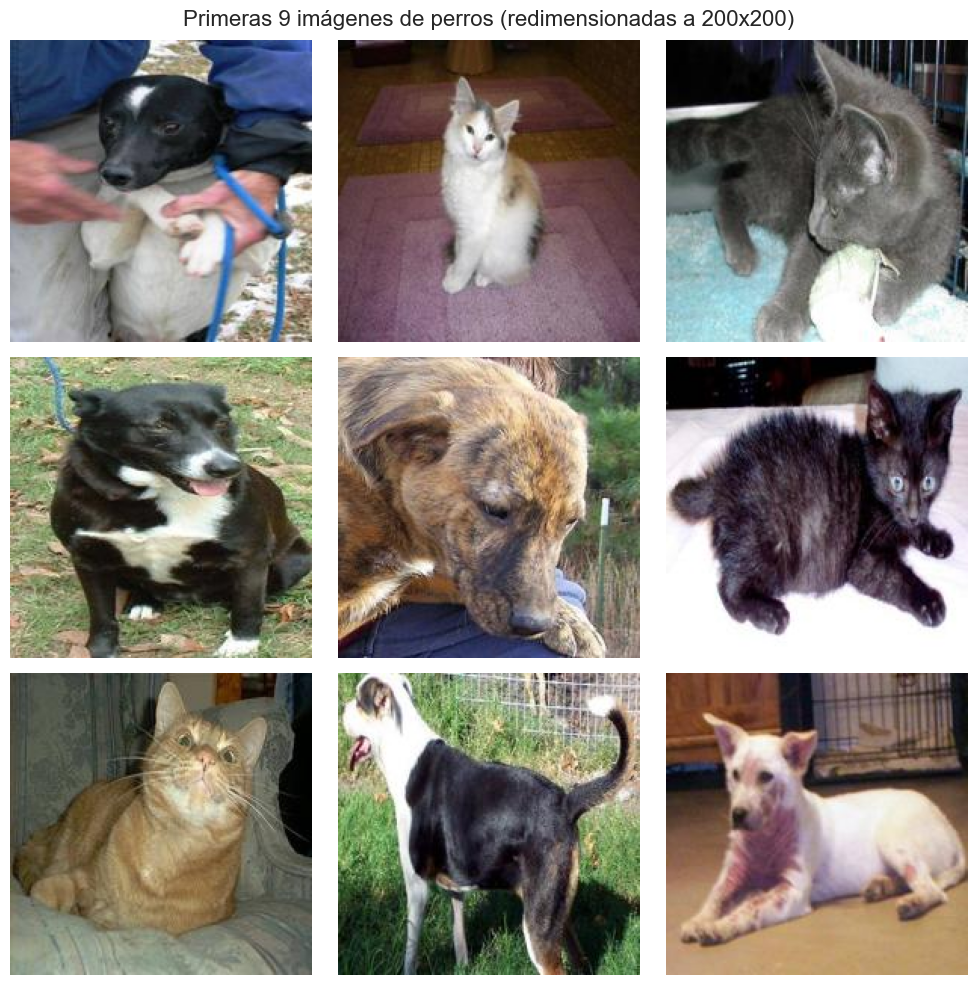

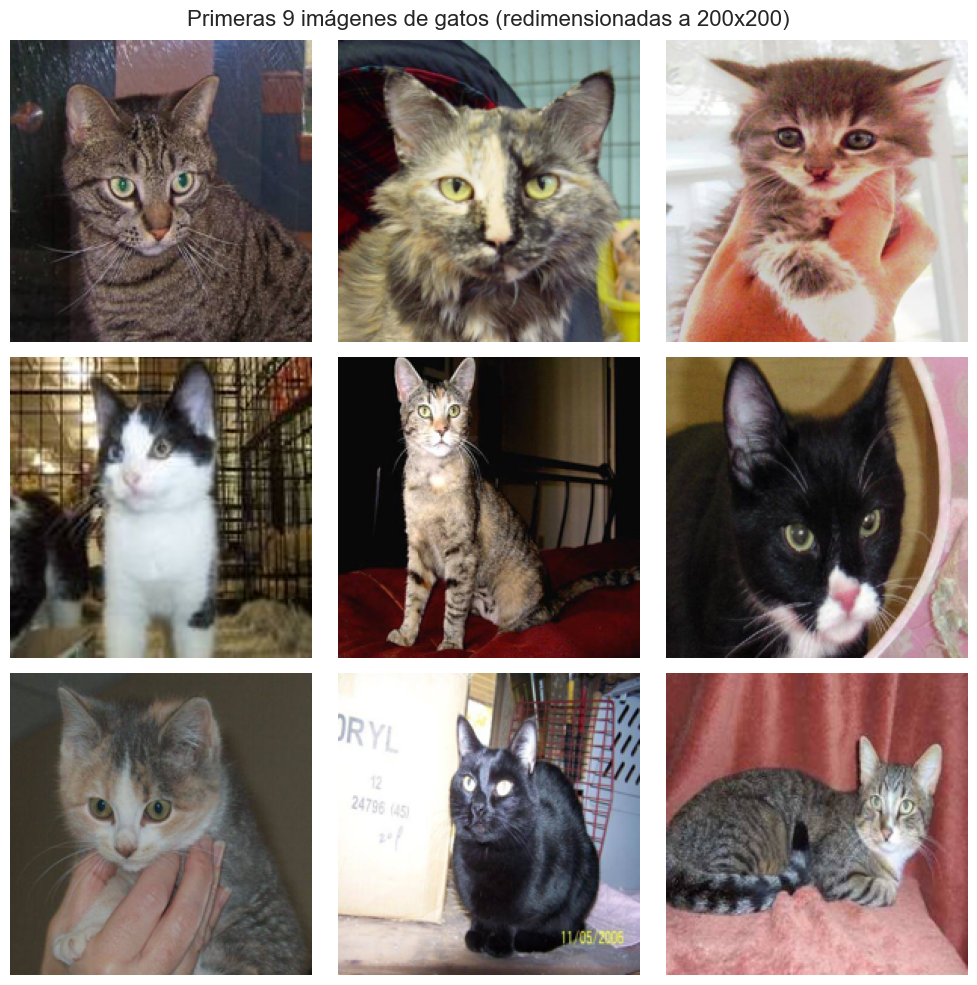

Found 37499 images belonging to 2 classes.
Found 37499 images belonging to 2 classes.


In [7]:
# -----------------------------------
# 1. Visualizar 9 imágenes por clase
# -----------------------------------
def show_sample_images(directory, title):
    image_paths = [os.path.join(directory, fname) for fname in os.listdir(directory)
                   if fname.lower().endswith(('.png', '.jpg', '.jpeg'))][:9]

    plt.figure(figsize=(10, 10))
    for i, path in enumerate(image_paths):
        img = Image.open(path).resize((200, 200))
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Rutas a las carpetas de imágenes
dog_dir = '../data/train/dog'
cat_dir = '../data/train/cat'

# Mostrar imágenes
show_sample_images(dog_dir, 'Primeras 9 imágenes de perros (redimensionadas a 200x200)')
show_sample_images(cat_dir, 'Primeras 9 imágenes de gatos (redimensionadas a 200x200)')

# --------------------------------------------------
# 2. Crear ImageDataGenerator para carga progresiva
# --------------------------------------------------

# Generador para entrenamiento (con aumentación)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generador para prueba (solo normalización)
test_datagen = ImageDataGenerator(rescale=1./255)

# Rutas a carpetas de datos
train_path = '../data/train'
test_path = '../data/test'

# Cargar datos desde directorio
trdata = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

tsdata = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


In [8]:
model = Sequential()
model.add(Input(shape=(224, 224, 3)))


# Bloque 1
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Bloque 2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Bloque 3
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Bloque 4
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Bloque 5
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Clasificador
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))  # 2 clases: gato o perro


In [9]:
model.compile(
    loss='categorical_crossentropy',  # Softmax -> categorical
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


In [ ]:

class MiClasePyDataset(PyDataset):
    def __init__(self, datos, **kwargs):
        super().__init__(**kwargs)  # Llama al constructor de la clase padre
        self.datos = datos
        # ... otro código de inicialización

In [ ]:
model.fit(
    trdata,
    validation_data=tsdata,
    epochs=10,
    steps_per_epoch=len(trdata),
    validation_steps=len(tsdata)
)


D:\Cositas de Alia\DataScience\Documentos\Redes neuronales\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 277/1172 ━━━━━━━━━━━━━━━━━━━━ 6:49:52 27s/step - accuracy: 0.6727 - loss: 0.6650

### Me encataria poneros el progreso de los 10 modelos que necesitaria este proyecto pero lo he intentado de todas las maneras y mi ordenador no lo consigue como mucho consiguio llegar al 3/10 pero no se por que se borro el progreso.
### Con todo mi pesar tengo que enseñaros hasta aqui porque mi ordenador ha decidido que en este proyecto no puede dar mas... si necesitais que ponga algo mas estare encantada a sugerencias..

In [4]:
tf.keras.backend.clear_session()